In [280]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## question 1

In [222]:
x = np.array([[12, 10], [10, 11]])
x_inv = np.linalg.inv(x)
y = np.array([[1],[0]])

In [223]:
beta = y.T @ x_inv
beta.shape

(1, 2)

In [224]:

beta @ x @ beta.T

array([[0.34375]])

## question 2 


In [225]:
x = np.array([[2, 0], [0, 1]])
beta_1_direction = np.linalg.eig(x)[1][:,0]


In [226]:
x = np.array([[2, 0], [0, 1]])
cov_x = x[0,1]
var_x1 = x[0][0]
cov_x /var_x1

0.0

In [227]:
x = np.array([[12, 10], [10, 11]])
cov_x = x[0,1]
var_x1 = x[0][0]
beta_2 = cov_x /var_x1
beta_1_direction = np.linalg.eig(x)[1][:,0]
print(beta_1_direction)
beta_1 = beta_1_direction[0]/beta_1_direction[1]
print(beta_1, beta_2)

[0.72454731 0.68922507]
1.0512492197250394 0.8333333333333334


## question 3 

In [228]:
## just advertising 
c = 960/900
r_2_adv = ((c**2)*900)/1600

In [229]:
## just temp
c = 720/400
r_2_temp = ((c**2)*400)/1600

In [230]:
x = np.array([[900, 540], [540, 400] ])
x_inv = np.linalg.inv(x)
cross = np.array([[960], [720]])
coefs = x_inv @ cross
var = coefs.T @ x @ coefs
r_2_mix = var[0][0]/ 1600
print(coefs)

[[-0.07017544]
 [ 1.89473684]]


In [231]:
print("r^2 of model with just advertising = {0}".format(r_2_adv) )
print("r^2 of model with just temperature = {0}".format(r_2_temp) )
print("r^2 of model with both advertising and temperature controlled for = {0}".format(r_2_mix) )
## so no under the assumptions of casual inference, i do nto agree as can see that temperature more than accounts for the predictivvity 
## of marketing 

r^2 of model with just advertising = 0.64
r^2 of model with just temperature = 0.81
r^2 of model with both advertising and temperature controlled for = 0.8105263157894744


## question 4 

In [232]:
originial_data = pd.read_csv('/home/buzgalbraith/work/school/spring_2023/probaility-theroy-2-2023/homework_code/homework_11/t_data.csv')
originial_data

,date,max_temp_C,min_temp_C,rain_mm
0,1853-01-01,8.4,2.7,62.8
1,1853-02-01,3.2,-1.8,29.3
2,1853-03-01,7.7,-0.6,25.9
3,1853-04-01,12.6,4.5,60.1
4,1853-05-01,16.8,6.1,59.5
...,...,...,...,...
1939,2014-08-01,20.8,11.7,85.6
1940,2014-09-01,21.1,11.4,4.1
1941,2014-10-01,16.8,9.9,65.6
1942,2014-11-01,11.5,5.7,98.6


In [345]:
data = originial_data.values
y = data[:,1]
ones = np.array(list(range(y.shape[0])))
X_train = ones[:1800]
X_test = ones[1800:]
y_train = y[:1800]
y_test = y[1800:]
cov = lambda x,y : np.mean(x*y) - np.mean(x)*np.mean(y)
cov(X_train, y_train)
X_train_ol = X_train
X_test_ol = X_test

In [326]:
cov = lambda x,y : np.mean(x*y) - np.mean(x)*np.mean(y)
def cross_cov(X,y):
    cross = np.ones(X.shape[1])
    for i in range(X.shape[1]):
        cross[i] = cov(y, X[:,i])
    return cross
def feature_transform(X, T):
    if(T==1):
        X_train = X 
    else:
        X_train = np.ones((X.shape[0],3))
        X_train[:, 0] = X
        X_train[:, 1] = np.cos(2 * X_train[:,0] * np.pi / T)
        X_train[:, 2] = np.sin(2 * X_train[:,0] * np.pi / T)
    return X_train
def fit_coeficent(X, y, T):
    beta = np.zeros((4))
    if(T!=1):
        X_cov = np.cov(X.T)
        X_cov_inv = np.linalg.inv(X_cov)
        cross = cross_cov(X,y)
        beta[1],beta[2],beta[3] = X_cov_inv@ cross.T
        preds = predict(beta, X, T)
    else:
         print("degenerate case")
         c = cov(X, y)
         v = cov(X,X)
         beta[1]= v/c
         preds = beta[1]*X
        
    beta[0] = np.mean(y-preds)
    return beta
T=2
errors = np.zeros((21))
print(errors.shape)
predict = lambda beta ,X, T : beta[0] + beta[1]*X[:,0] + beta[2] * X[:,1] + beta[3] * X[:,2]
def mse(beta, X , y,  T):
    try:
        return np.sum(  np.square(y-predict(beta, X, T) )  )
    except:
        return np.sum(  np.square(y-beta[1]*X )  )
for T in range(1,21):
    print(T)
    X_train = feature_transform(X_train_ol, T)
    beta = fit_coeficent(X_train, y_train, T )
    errors[T] = mse(beta, X_train , y_train,  T )
errors = errors[1:]

(21,)
1
degenerate case
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


array([9.46833220e+15, 5.79774439e+04, 5.79686192e+04, 5.79704915e+04,
       5.79782892e+04, 5.76624051e+04, 5.79773516e+04, 5.79659785e+04,
       5.79787572e+04, 5.79596168e+04, 5.79285101e+04, 5.51305577e+03,
       5.79421781e+04, 5.79720015e+04, 5.79631592e+04, 5.79681886e+04,
       5.79780658e+04, 5.79772130e+04, 5.79764060e+04, 5.79684230e+04])

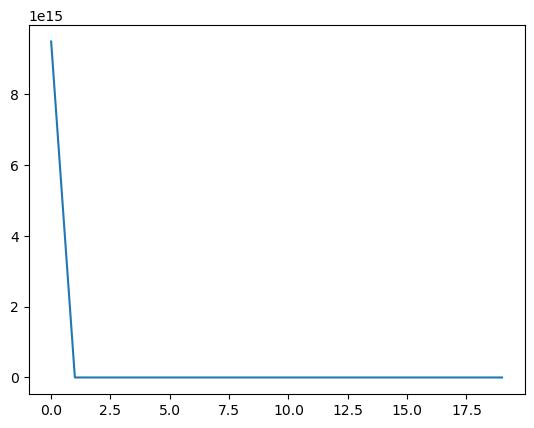

In [327]:
plt.plot(range(20), errors[range(20)])
errors

In [330]:
X_train[:,0]

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.797e+03, 1.798e+03,
       1.799e+03])

array([ 5.79112333,  6.5701693 ,  9.18118319, ..., 14.67221712,
       10.8000884 ,  7.83609024])

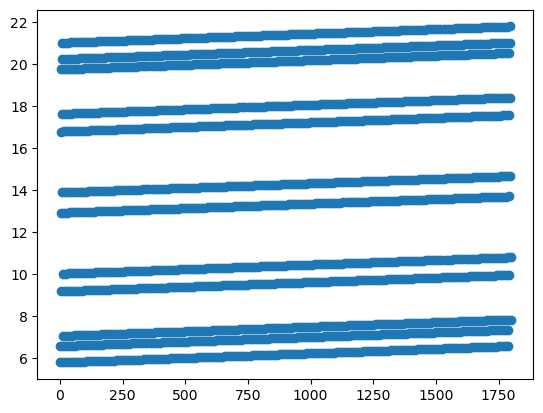

In [358]:
T_star = 12
X_train = feature_transform(X_train_ol, T_star)
beta_star = fit_coeficent(X_train, y_train, T_star )
predict_star = predict(beta_star, X_train, T_star)
plt.scatter(range(X_train.shape[0]), predict_star)
predict_star
plt.xlabel("number of months after start of training data")
plt.ylabel("model prediction")
plt.title("model predictions on training set")

0.0004352315786166086


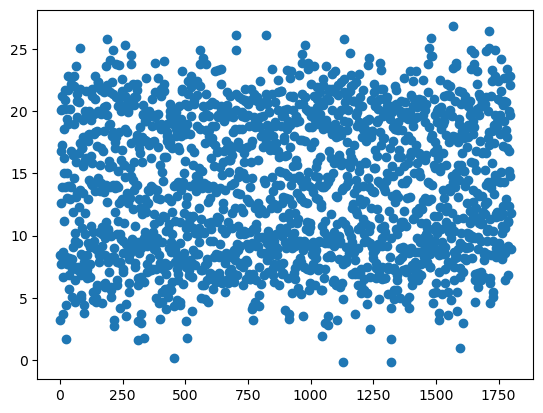

In [355]:
plt.scatter(range(y_train.shape[0]), y_train)
y_train
print(beta_star[1])

12


Text(0.5, 1.0, 'model residuals on training set')

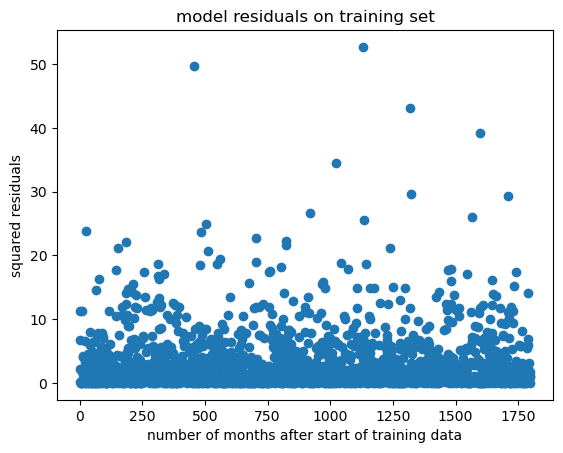

In [353]:
T_star = np.argmin(errors)+1
print(T_star)
X_train = feature_transform(X_train_ol, T_star)
predict_star = predict(beta_star, X_train, T_star)
plt.scatter(range(X_train.shape[0]), (predict_star-y_train)**2)
plt.xlabel("number of months after start of training data")
plt.ylabel("squared residuals")
plt.title("model residuals on training set")

Text(0.5, 1.0, 'model residuals on test set')

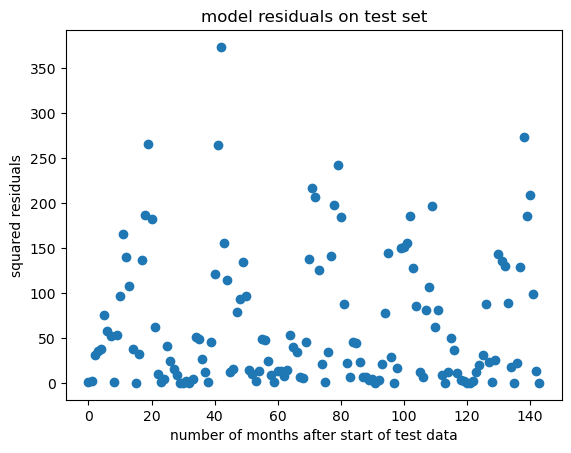

In [349]:
X_test = feature_transform(X_test_ol, T)
predict_star = predict(beta_star, X_test, T_star)
plt.scatter(range(X_test.shape[0]), (predict_star-y_test)**2)
plt.xlabel("number of months after start of test data")
plt.ylabel("squared residuals")
plt.title("model residuals on test set")